In [1]:
import matplotlib.pyplot as plt

from data import sequence_to_text
from preprocess import get_dataset, DataLoader, collate_fn_transformer
from module import TextPrenet, SpeechPrenet

### Check network input
Get the inputs to the network as described in `train.py` inputs are as expected.

In [2]:
dataset = get_dataset()
dataloader = DataLoader(dataset, batch_size=32,
                        shuffle=True, collate_fn=collate_fn_transformer,
                        drop_last=True, num_workers=16)

Dataloader's first row:

In [3]:
tensor = next(iter(dataloader))
text, mel, mel_input, pos_text, pos_mel, text_length = tensor

In [4]:
print("Text:", text[0])
print("Mel:", mel[0])
print("Mel Input:", mel_input[0])
print("Pos Text:", pos_text[0])
print("Pos Mel:", pos_mel[0])
print("Text Length:", text_length[0])

Text: tensor([28, 32,  2,  4, 33,  9,  4,  6, 12,  4,  5, 34,  2,  4, 31,  9, 32, 21,
         2, 34, 17,  2,  4,  7, 27, 15, 32, 21,  2, 10,  8, 34, 24,  2, 28, 32,
         2,  4, 15, 18, 36, 14, 32, 15,  2,  4, 21, 12, 14, 20, 34, 22,  2,  4,
        21, 32, 20, 24, 34, 21,  2, 20, 33, 19, 20, 34,  4, 26, 33, 17, 32, 22,
        34, 24, 26,  2, 28, 32,  2, 17,  8, 34, 16,  2, 32, 24,  2, 32,  2,  4,
        19, 30, 21, 32,  6, 15, 12,  2,  4,  7,  8, 34, 17, 38, 32, 20, 32, 21,
         2, 34, 17,  7, 32,  4, 24, 34, 38, 32, 25, 32, 15,  2, 34, 17,  2, 28,
        32,  2,  4,  7, 27, 15, 32, 21,  2,  4, 33, 20, 12, 32,  2, 11, 23,  2,
        25, 30, 26,  2, 34, 17,  4, 24, 33, 21, 22, 32, 10,  8, 34, 22, 34,  7])
Mel: tensor([[1.2520e-01, 1.3795e-01, 1.5394e-01,  ..., 2.9116e-01, 2.7815e-01,
         2.8009e-01],
        [7.5999e-02, 1.1673e-01, 1.7892e-01,  ..., 3.6558e-01, 3.9894e-01,
         3.1991e-01],
        [1.0000e-08, 1.2336e-01, 2.3611e-01,  ..., 4.5961e-01, 4.8891e-01,

As expected, the input to the text encoders are the phoneme sequences:

In [5]:
sequence_to_text(text[0].numpy().tolist())

'ðə ˈɛfˈbiˈaɪ ˈɔfəs ɪn ˈdæləs geɪv ðə ˈloʊkəl ˈsikrɪt ˈsərvɪs rɛprɪˈzɛnətɪvz ðə neɪm əv ə ˈpɑsəbli ˈdeɪnʤərəs ɪndəˈvɪʤəwəl ɪn ðə ˈdæləs ˈɛriə hu wɑz ɪnˈvɛstəgeɪtɪd'

The input to the speech encoders are the mel spectrograms (80 mel filters per window):

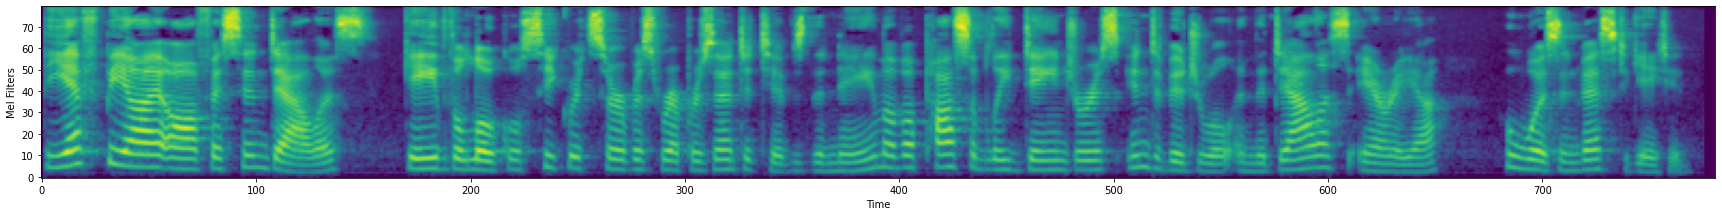

In [6]:
fig = plt.figure(figsize=(30, 100))
_ = plt.imshow(mel_input[0].numpy().T, origin="lower")
_ = plt.xlabel("Time")
_ = plt.ylabel("Mel Filters")

### Test Text Prenet

In [7]:
text_prenet = TextPrenet(embedding_size=512,  # from Transformer-TTS
                         num_hidden=256)  # from Transformer-TTS

In [8]:
text_prenet_output = text_prenet(text).detach()

In [9]:
print("Input shape:", text.shape)

Input shape: torch.Size([32, 162])


In [10]:
print("Output shape:", text_prenet_output.shape)

Output shape: torch.Size([32, 162, 256])


As expected, output an embedding of 256 for each phoneme.

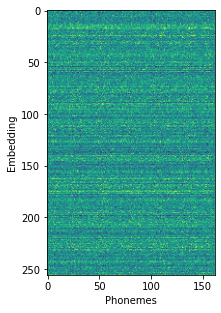

In [11]:
fig = plt.figure(figsize=(3, 20))
_ = plt.imshow(text_prenet_output[0].T)
_ = plt.ylabel("Embedding")
_ = plt.xlabel("Phonemes")

### Test Speech Prenet

In [12]:
speech_prenet = SpeechPrenet(input_size=80,  # 80 mel filters
                             hidden_size=256,  # as indicated in Ren's paper
                             output_size=256)  # this depends on decoder

In [13]:
speech_prenet_output = speech_prenet(mel_input).detach()

In [14]:
print("Input shape:", mel_input.shape)

Input shape: torch.Size([32, 781, 80])


In [15]:
print("Output shape:", speech_prenet_output.shape)

Output shape: torch.Size([32, 781, 256])
